In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("diabetic_data_final.csv")

In [2]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,107387004,81712926,Caucasian,Female,[40-50),?,6,1,17,9,...,No,No,No,No,No,No,No,No,No,<30
1,154589094,41686677,Caucasian,Female,[70-80),?,3,2,1,4,...,No,No,No,No,No,No,No,No,Yes,<30
2,104920698,72835722,Caucasian,Female,[40-50),[125-150),1,1,7,3,...,No,No,No,No,No,No,No,No,Yes,>30
3,44963256,18465768,Caucasian,Male,[50-60),?,2,1,1,11,...,No,No,No,No,No,No,No,No,No,NO
4,53964522,1032228,Caucasian,Male,[70-80),?,1,1,7,5,...,No,Down,No,No,No,No,No,Ch,Yes,>30


In [3]:
df.shape

(34319, 50)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34319 entries, 0 to 34318
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              34319 non-null  int64 
 1   patient_nbr               34319 non-null  int64 
 2   race                      34319 non-null  object
 3   gender                    34319 non-null  object
 4   age                       34319 non-null  object
 5   weight                    34319 non-null  object
 6   admission_type_id         34319 non-null  int64 
 7   discharge_disposition_id  34319 non-null  int64 
 8   admission_source_id       34319 non-null  int64 
 9   time_in_hospital          34319 non-null  int64 
 10  payer_code                34319 non-null  object
 11  medical_specialty         34319 non-null  object
 12  num_lab_procedures        34319 non-null  int64 
 13  num_procedures            34319 non-null  int64 
 14  num_medications       

In [5]:
df.isnull().sum().sum()

59702

In [6]:
df['max_glu_serum'].unique()

array([nan, 'Norm', '>300', '>200'], dtype=object)

In [7]:
df['max_glu_serum']=df['max_glu_serum'].astype('object')
df['max_glu_serum']=df['max_glu_serum'].fillna('None')


In [8]:
df['A1Cresult'].unique()

array([nan, '>7', '>8', 'Norm'], dtype=object)

In [9]:
df['A1Cresult'] = df['A1Cresult'].astype('object') 
df['A1Cresult']=df['A1Cresult'].fillna('None')


In [10]:
# Get all object (categorical/string) columns
object_cols = df.select_dtypes(include='object').columns
print("Object columns:\n", object_cols)


Object columns:
 Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [11]:
df['citoglipton'].unique()       # Only if single unique value
    # 'citoglipton

array(['No'], dtype=object)

In [12]:
columns_to_drop = [
    'encounter_id',
    'patient_nbr',
    'race',
    'weight',
    'payer_code',
    'medical_specialty',
    'examide',      
    'citoglipton'
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34319 entries, 0 to 34318
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    34319 non-null  object
 1   age                       34319 non-null  object
 2   admission_type_id         34319 non-null  int64 
 3   discharge_disposition_id  34319 non-null  int64 
 4   admission_source_id       34319 non-null  int64 
 5   time_in_hospital          34319 non-null  int64 
 6   num_lab_procedures        34319 non-null  int64 
 7   num_procedures            34319 non-null  int64 
 8   num_medications           34319 non-null  int64 
 9   number_outpatient         34319 non-null  int64 
 10  number_emergency          34319 non-null  int64 
 11  number_inpatient          34319 non-null  int64 
 12  diag_1                    34319 non-null  object
 13  diag_2                    34319 non-null  object
 14  diag_3                

In [14]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\n Column: {col}")
    print(f" Unique values ({len(unique_vals)}): {unique_vals[:]}")



 Column: gender
 Unique values (2): ['Female' 'Male']

 Column: age
 Unique values (10): ['[40-50)' '[70-80)' '[50-60)' '[60-70)' '[80-90)' '[30-40)' '[90-100)'
 '[10-20)' '[20-30)' '[0-10)']

 Column: admission_type_id
 Unique values (7): [6 3 1 2 5 8 4]

 Column: discharge_disposition_id
 Unique values (23): [ 1  2  3  6 18  4  5  7 22 25 14 28 11 23  9 15 17  8 13 12 10 24 16]

 Column: admission_source_id
 Unique values (12): [17  1  7  3  4  6 20  5  2  9  8 22]

 Column: time_in_hospital
 Unique values (14): [ 9  4  3 11  5  8  6  1  7  2 12 14 10 13]

 Column: num_lab_procedures
 Unique values (114): [ 66  32  56  59  49  55  16  63  28  26  50  22   1  38  21  44  31  67
  41  60  62  78  64  35   4  42  36  18  48  51  74  23  37  46  40  27
  90  52  54  61  34  77  25  43  11  65 106 108  75   9  47  53  33  45
   7  39  68  29  19  72  93  58  57  80  10   3  69  12  24  76  71  20
  94  17  81  88  89   6  30  70  86  83  14   8  13  73  15  98   5  84
  97  92  91   2  8

In [15]:
df = df[df['gender'] != 'Unknown/Invalid']


In [16]:
# max_glu_serum and A1Cresult
ordinal_map = {'None': 0, 'Norm': 1, '>200': 2, '>300': 3}
df['max_glu_serum'] = df['max_glu_serum'].map(ordinal_map)

a1c_map = {'None': 0, 'Norm': 1, '>7': 2, '>8': 3}
df['A1Cresult'] = df['A1Cresult'].map(a1c_map)


In [17]:
drug_map = {'No': 0, 'Steady': 1, 'Down': 2, 'Up': 3}
drug_columns = [col for col in df.columns if col in [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone'
]]
for col in drug_columns:
    df[col] = df[col].map(drug_map)


In [18]:

df['change'] = df['change'].map({'No': 0, 'Ch': 1})

df['diabetesMed'] = df['diabetesMed'].map({'No': 0, 'Yes': 1})


In [19]:
# Remove 'age' from one-hot encoding
df = pd.get_dummies(df, columns=[
    'gender', 
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id'
], dtype=int)

# Map age to numerical midpoints
age_map = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}
df['age_num'] = df['age'].map(age_map)

# Drop original 'age' column
df.drop('age', axis=1, inplace=True)


In [20]:
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,...,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_17,admission_source_id_20,admission_source_id_22,age_num
0,9,66,3,33,0,1,6,493,491,518,...,0,0,0,0,0,0,1,0,0,45
1,4,32,0,25,0,0,1,V57,438,438,...,0,0,0,0,0,0,0,0,0,75
2,3,56,0,12,3,0,1,295,493,780,...,0,0,0,1,0,0,0,0,0,45
3,11,59,3,23,0,0,0,428,996,403,...,0,0,0,0,0,0,0,0,0,55
4,5,49,2,11,0,0,0,414,413,426,...,0,0,0,1,0,0,0,0,0,75


In [21]:
def map_diag(code):
    try:
        code = float(code)
    except:
        return 'Unknown'

    if (390 <= code <= 459) or (code == 785):
        return 'Circulatory'
    elif (460 <= code <= 519) or (code == 786):
        return 'Respiratory'
    elif (520 <= code <= 579) or (code == 787):
        return 'Digestive'
    elif code == 250:
        return 'Diabetes'
    elif 800 <= code <= 999:
        return 'Injury'
    elif 710 <= code <= 739:
        return 'Musculoskeletal'
    elif 140 <= code <= 239:
        return 'Neoplasms'
    else:
        return 'Other'
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].apply(map_diag)
df = pd.get_dummies(df, columns=['diag_1', 'diag_2', 'diag_3'], dtype=int)


In [22]:
# List of diagnosis categories (based on your mapping)
diagnosis_categories = ['Circulatory', 'Respiratory', 'Digestive', 'Diabetes',
                        'Injury', 'Musculoskeletal', 'Neoplasms', 'Other']

# Combine diag_1_, diag_2_, diag_3_ columns into one per category
for category in diagnosis_categories:
    df[category + '_combined'] = (
        df.get('diag_1_' + category, 0) +
        df.get('diag_2_' + category, 0) +
        df.get('diag_3_' + category, 0)
    )

# Optional: Convert to binary (if you only care about presence, not count)
for category in diagnosis_categories:
    df[category + '_combined'] = df[category + '_combined'].apply(lambda x: 1 if x > 0 else 0)
# Drop individual one-hot columns for diag_1, diag_2, diag_3
diag_cols = [col for col in df.columns if col.startswith('diag_1_') or col.startswith('diag_2_') or col.startswith('diag_3_')]
df.drop(columns=diag_cols, inplace=True)


In [23]:
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,...,admission_source_id_22,age_num,Circulatory_combined,Respiratory_combined,Digestive_combined,Diabetes_combined,Injury_combined,Musculoskeletal_combined,Neoplasms_combined,Other_combined
0,9,66,3,33,0,1,6,9,0,0,...,0,45,0,1,0,0,0,0,0,0
1,4,32,0,25,0,0,1,9,0,0,...,0,75,1,0,0,0,0,0,0,0
2,3,56,0,12,3,0,1,9,0,0,...,0,45,0,1,0,0,0,0,0,1
3,11,59,3,23,0,0,0,9,0,0,...,0,55,1,0,0,0,1,0,0,0
4,5,49,2,11,0,0,0,8,0,0,...,0,75,1,0,0,0,0,0,0,0


In [24]:
df['drug_score'] = df[drug_columns].sum(axis=1)
df.drop(columns=drug_columns, inplace=True)


In [25]:
df['total_interventions'] = (
    df['num_lab_procedures'] + 
    df['num_procedures'] + 
    df['num_medications']
)


In [26]:
df['total_visits'] = (
    df['number_outpatient'] + 
    df['number_emergency'] + 
    df['number_inpatient']
)


In [27]:
df['inpatient_ratio'] = df['number_inpatient'] / (df['total_visits'] + 1)


In [28]:
df.drop(columns=['num_lab_procedures', 'num_procedures', 'num_medications','number_outpatient','number_emergency','number_inpatient'], inplace=True)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34319 entries, 0 to 34318
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time_in_hospital             34319 non-null  int64  
 1   number_diagnoses             34319 non-null  int64  
 2   max_glu_serum                34319 non-null  int64  
 3   A1Cresult                    34319 non-null  int64  
 4   change                       34319 non-null  int64  
 5   diabetesMed                  34319 non-null  int64  
 6   readmitted                   34319 non-null  object 
 7   gender_Female                34319 non-null  int32  
 8   gender_Male                  34319 non-null  int32  
 9   admission_type_id_1          34319 non-null  int32  
 10  admission_type_id_2          34319 non-null  int32  
 11  admission_type_id_3          34319 non-null  int32  
 12  admission_type_id_4          34319 non-null  int32  
 13  admission_type_i

In [30]:
df['readmitted'].unique()
df['readmitted'].value_counts()

readmitted
>30    12198
<30    11357
NO     10764
Name: count, dtype: int64

In [31]:

df['readmit_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)


In [32]:
df.drop('readmitted', axis=1, inplace=True)


In [33]:
X=df.drop('readmit_binary',axis=1)
y=df['readmit_binary']

In [34]:
y.value_counts(normalize=True)

readmit_binary
0    0.669075
1    0.330925
Name: proportion, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "SVM (RBF Kernel)": SVC(kernel='rbf', class_weight='balanced', probability=True),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}
for name, model in models.items():
    print(f"\n🔍 Training: {name}")
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    print("📊 Accuracy:", accuracy_score(y_test, preds))
    print("🔁 Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("📃 Classification Report:\n", classification_report(y_test, preds))


🔍 Training: Logistic Regression
📊 Accuracy: 0.7049825174825175
🔁 Confusion Matrix:
 [[3261 1332]
 [ 693 1578]]
📃 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76      4593
           1       0.54      0.69      0.61      2271

    accuracy                           0.70      6864
   macro avg       0.68      0.70      0.69      6864
weighted avg       0.73      0.70      0.71      6864


🔍 Training: Random Forest
📊 Accuracy: 0.7466491841491841
🔁 Confusion Matrix:
 [[4096  497]
 [1242 1029]]
📃 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.82      4593
           1       0.67      0.45      0.54      2271

    accuracy                           0.75      6864
   macro avg       0.72      0.67      0.68      6864
weighted avg       0.74      0.75      0.73      6864


🔍 Training: SVM (RBF Kernel)
📊 Accuracy: 0.7236305361305362
🔁 Confusion Mat

In [42]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Fit RF on SMOTE-balanced training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Get importance scores
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values(ascending=False)

# Show top features
top_k = 15 # Change to 20 or 50 based on your choice
top_features = importances_sorted.head(top_k).index.tolist()

print("Top Important Features:\n", top_features)


Top Important Features:
 ['total_interventions', 'time_in_hospital', 'age_num', 'number_diagnoses', 'total_visits', 'inpatient_ratio', 'drug_score', 'A1Cresult', 'Circulatory_combined', 'Other_combined', 'Respiratory_combined', 'discharge_disposition_id_18', 'discharge_disposition_id_22', 'gender_Male', 'gender_Female']


In [43]:
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)


model = LogisticRegression(max_iter=1000)
model.fit(X_train_top_scaled, y_train)

# Predict & evaluate


preds = model.predict(X_test_top_scaled)

print("📊 Accuracy:", accuracy_score(y_test, preds))
print("🔁 Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("📃 Classification Report:\n", classification_report(y_test, preds))

📊 Accuracy: 0.710955710955711
🔁 Confusion Matrix:
 [[4241  352]
 [1632  639]]
📃 Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.92      0.81      4593
           1       0.64      0.28      0.39      2271

    accuracy                           0.71      6864
   macro avg       0.68      0.60      0.60      6864
weighted avg       0.70      0.71      0.67      6864



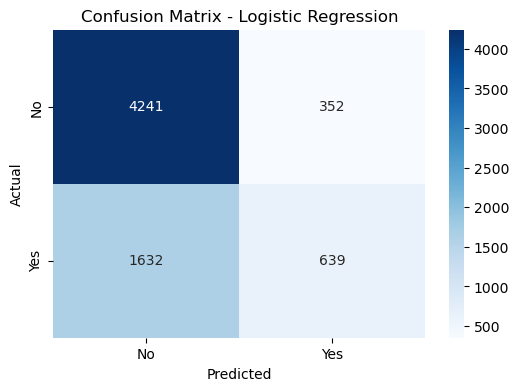

In [46]:

import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example usage (after model prediction)
plot_confusion_matrix(y_test, preds, model_name="Logistic Regression")
